#### Importación de bibliotecas

In [12]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carga de base de datos
Anuncios de inmuebles de alquiler turístico en las principales plataformas.

In [13]:
# Definir la paleta institucional (colocarla en una celda anterior si es necesario)
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]


#### Conexión a MySQL

In [14]:
"""Conecta a MySQL, obtiene todas las tablas y las guarda como DataFrames en un diccionario."""

def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025'].


C:\Users\jodri\AppData\Local\Temp\ipykernel_3272\1189579851.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"
Se creó el dataframe "Tourist_Accommodation17032025"


## Exploración inicial

In [15]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation10032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


### Tamaño

In [16]:
df.shape

(15000, 35)

### Tipos de datos

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 15000 non-null  int64  
 1   name                         14996 non-null  object 
 2   description                  14790 non-null  object 
 3   host_id                      15000 non-null  int64  
 4   neighbourhood_name           15000 non-null  object 
 5   neighbourhood_district       9111 non-null   object 
 6   room_type                    15000 non-null  object 
 7   accommodates                 15000 non-null  int64  
 8   bathrooms                    14885 non-null  object 
 9   bedrooms                     14893 non-null  object 
 10  beds                         14940 non-null  float64
 11  amenities_list               14975 non-null  object 
 12  price                        14622 non-null  float64
 13  minimum_nights  

#### Corrección de tipos de datos

In [18]:
# conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')

# conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)

df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 15000 non-null  int64         
 1   name                         14996 non-null  object        
 2   description                  14790 non-null  object        
 3   host_id                      15000 non-null  int64         
 4   neighbourhood_name           15000 non-null  object        
 5   neighbourhood_district       9111 non-null   object        
 6   room_type                    15000 non-null  object        
 7   accommodates                 15000 non-null  int64         
 8   bathrooms                    14885 non-null  float64       
 9   bedrooms                     14893 non-null  float64       
 10  beds                         14940 non-null  float64       
 11  amenities_list               14975 non-nu

C:\Users\jodri\AppData\Local\Temp\ipykernel_3272\3580156214.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\jodri\AppData\Local\Temp\ipykernel_3272\3580156214.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\jodri\AppData\Local\Temp\ipykernel_3272\3580156214.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (

### Duplicados

In [30]:
df.duplicated().sum()


5000

In [31]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 15000
Total de duplicados exactos: 5000
El número de apartment_id duplicados es: 5350


### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0       6.0     29.0
bathrooms                       1.60                 0.99     0.0       1.0      1.0       2.0     13.0
bedrooms                        1.93                 1.34     0.0       1.0      2.0       3.0     50.0
beds                            2.92                 2.26     0.0       1.0      2.0       4.0     30.0
price                        1024.61               990.07    60.0     450.0    750.0    1240.0  28571.0
minimum_nights                  4.96                18.51     1.0       1.0      2.0       4.0   1125.0
maximum_nights                759.17               498.38     1.0      62.0   1125.0    1125.0   1125.0
availability_30                12.93                11.81     0.0       0.0     11.0      26.0     30.0
availability_60            

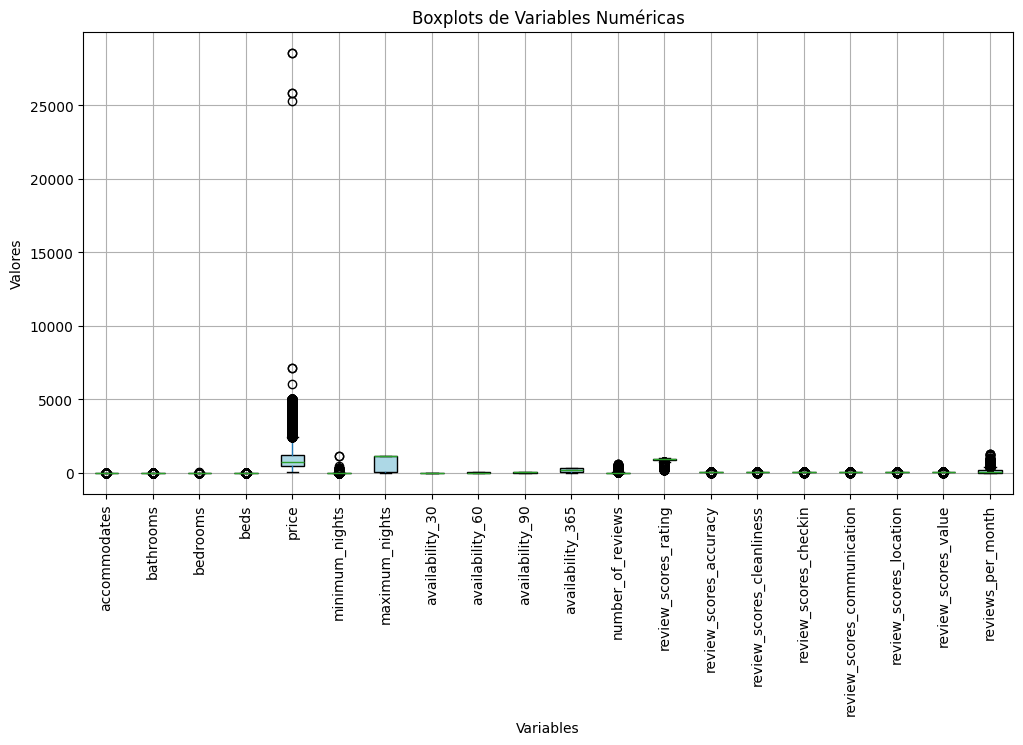

In [20]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

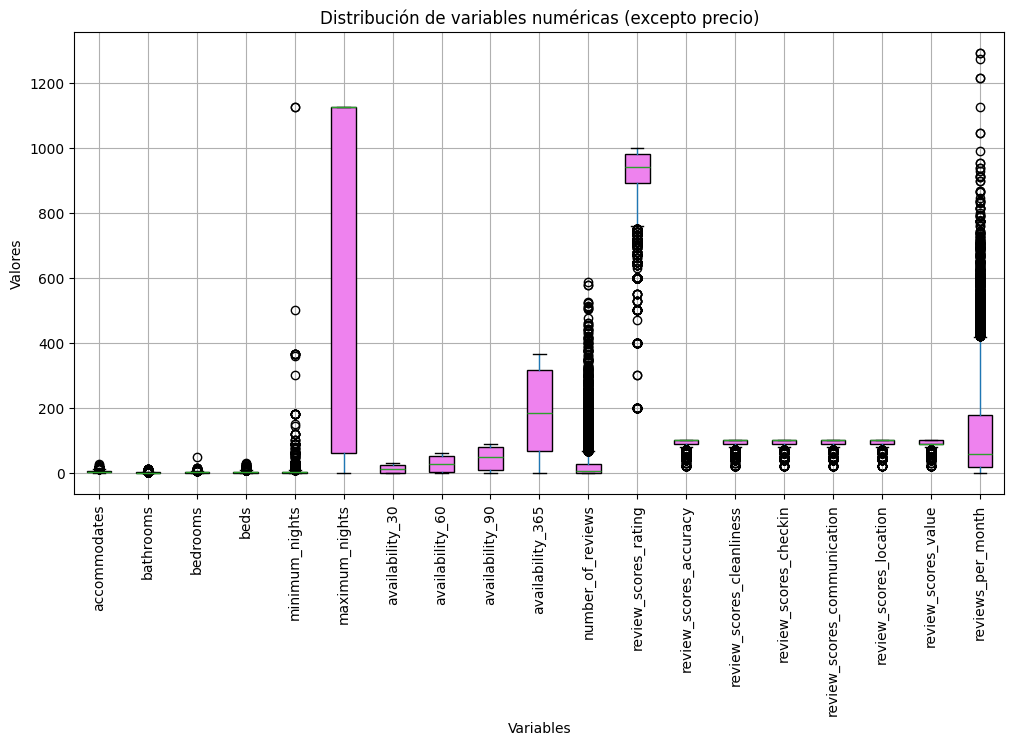

In [28]:
# nuevo gráfico sin precio para visualizar mejor las demás variables

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## Limpieza de datos (Data Cleaning)

### Tratamiento de duplicados

In [11]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 15000
Total de duplicados exactos: 5000
El número de apartment_id duplicados es: 5350


In [32]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,spain,malaga,2018-07-31
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaT,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,spain,sevilla,2019-07-29
13,89776,Modernist flat Downtown Casa Estap� | Barcelona,"Unique and rare ! Stay in the Casa Estap�, jew...",488151,el Fort Pienc,Eixample,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",650.0,3,365,True,7,18,41,224,322,2011-10-11,2019-01-12,960.0,100.0,100.0,100.0,100.0,100.0,100.0,True,327.0,spain,barcelona,2019-12-10
14,89954,Amazing apt in the historic center,"Beautiful, new, central and cosy apartment per...",487095,Palacio,Centro,Entire home/apt,6,1.0,2.0,3.0,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1030.0,2,20,True,27,48,49,61,181,2011-01-07,2018-01-11,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,202.0,spain,madrid,2018-11-07
17,103386,"Central 2 Bedrooms, 3/5 pers. Wi-Fi","This is Edificio Palomar Apartments, I will tr...",508042,EL PILAR,CIUTAT VELLA,Entire home/apt,5,1.0,2.0,3.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",840.0,1,14,True,17,38,64,229,13,2011-01-11,NaT,930.0,100.0,100.0,100.0,90.0,90.0,100.0,False,13.0,spain,valencia,2019-10-31
18,107437,A beautiful villa in Barcelona,"A conserved, period villa situated in the mids...",556626,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,8,2.0,5.0,6.0,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",2200.0,3,120,True,12,41,59,250,34,2011-08-07,NaT,930.0,100.0,100.0,100.0,100.0,100.0,90.0,True,38.0,spain,barcelona,2018-10-10
19,121210,"BIG ROOM IN CITY CENTER,NEAR BEACH!","The best room in Barcelona! Nice room, in a c...",594334,el Fort Pienc,Eixample,Private room,2,0.0,1.0,1.0,"TV,Internet,Wifi,Kitchen,Elevator,Washer,Essen...",510.0,5,365,True,13,38,68,68,154,NaT,2017-09-12,890.0,90.0,90.0,90.0,90.0,90.0,90.0,False,184.0,spain,barcelona,2018-04-12
20,128463,Private Suite in residential area!!,My House is located in the quiet district of S...,635253,Sants,Sants-Montju�c,Private room,2,2.0,1.0,1.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",300.0,3,1125,True,3,16,28,264,184,2011-03-09,NaT,970.0,100.0,100.0,100.0,100.0,90.0,100.0,True,235.0,spain,barcelona,2018-02-07
21,131987,SEVILLA CENTER 4 PAX.GREAT REVIEWS 1 BR+WIFI+AC,OFFER SPRING & SUMMER : -5 or 6 nights=5% disc...,1535528,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,1.0,2.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",690.0,4,365,True,30,60,90,163,235,2012-12-03,2020-12-03,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,235.0,spain,sevilla,2020-05-30
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1.0,1.0,1.0,"Wireless Internet,Wheelchair accessible,Elevat...",470.0,2,365,True,22,52,82,357,32,2011-04-07,2016-04-08,870.0,80.0,90.0,90.0,90.0,90.0,80.0,False,42.0,spain,barcelona,2017-09-12


Se decidió borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida cómo los tratará en su análisis.

In [33]:
df = df.drop_duplicates()

In [35]:
df.shape

(10000, 35)

### Valores nulos

In [14]:
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6897
last_review_date               6944
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

#### Eliminación de columnas irrelevantes

In [15]:
df = df.drop(columns=['description', 'country'])

#### Función de imputación de nulos

In [36]:
def imputación_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo y completa sus valores faltantes 
    con los del más reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (más antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputación_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

#### Neighbourhood_district

In [17]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

#### Características numéricas del alojamiento
Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.

In [18]:
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

#### Precio

In [19]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

#### Columnas de texto

In [20]:
df["name"].fillna("Desconocido", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\1815731930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Desconocido", inplace=True)


#### Verificación

In [21]:
df.isnull().sum()

apartment_id                      0
name                              0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6883
last_review_date               6901
review_scores_rating           2685
review_scores_accuracy         2694
review_scores_cleanliness      2688
review_scores_checkin          2699
review_scores_communication    2690
review_scores_location      

El df resultante tiene únicamente nulos en las variables relativas a las reseñas, lo cual es esperable, ya que no todos los avisos tendrán reseñas.

## Transformación de Datos (Data Transformation)

In [22]:
# Definir las columnas numéricas sobre las que calcular la media
# columnas_media = ["availability_30", "availability_60", "availability_90", "availability_365"]

# # Agrupar por 'apartment_id' y calcular la media de las columnas seleccionadas
# df_agrupado = df.groupby("apartment_id", as_index=False)[columnas_media].mean()

# # Mostrar el resultado
# # Si usas Jupyter Notebook, puedes usar display() para mejor visualización
# from IPython.display import display
# display(df_agrupado)

In [23]:
# print(df_agrupado[df_agrupado['apartment_id'] == 343864])

In [24]:
# df_agrupado.duplicated().sum()

## Reducción de Datos (Data Reduction)

## Fin de la limpieza - Dataset limpio

# EDA Inventario - Inicio

## **Rol**: Operaciones y gestión de inventario

## **Objetivo de negocio:** Supervisar la disponibilidad, ocupacción y operaciones eficientes de los alojamientos

### **Pregunta de Negocio**: ¿Qué impacto tiene la opción de reservar automáticamente (sin revisión del propietario) a la disponibilidad media en cada ciudad?

In [40]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 10000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observación de la misma propiedad. 

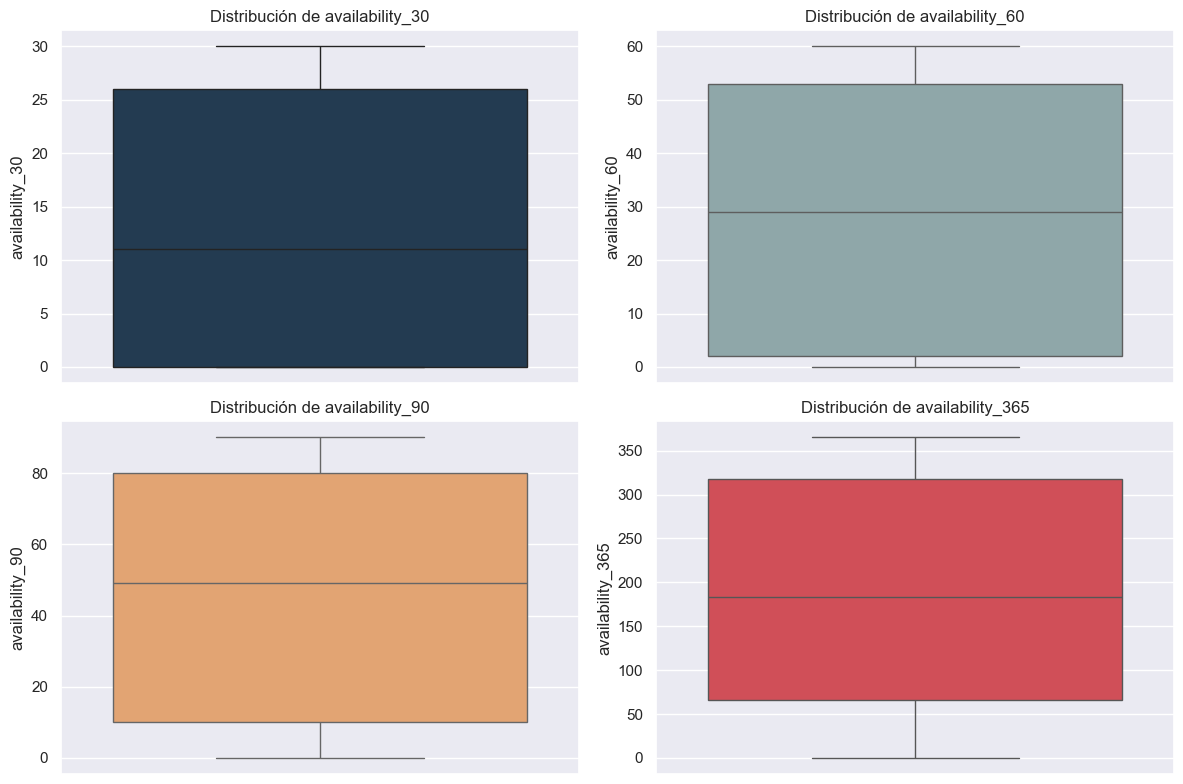

In [58]:
# Seleccionar 4 colores distintos para los boxplots
colores_seleccionados = [paleta[0], paleta[2], paleta[6], paleta[10]]  # Azul profundo, Azul grisáceo, Naranja suave, Rojo coral

availability_cols = ["availability_30", "availability_60", "availability_90", "availability_365"]

# Crear la figura con subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer las columnas y asignarlas a los subgráficos
for i, col in enumerate(availability_cols):
    row, col_idx = divmod(i, 2)  # Calcular posición en la cuadrícula
    sns.boxplot(y=df[col], ax=axes[row, col_idx], color=colores_seleccionados[i])  # Aplicar color de la paleta  # Crear boxplot
    axes[row, col_idx].set_title(f'Distribución de {col}')  # Agregar título

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()

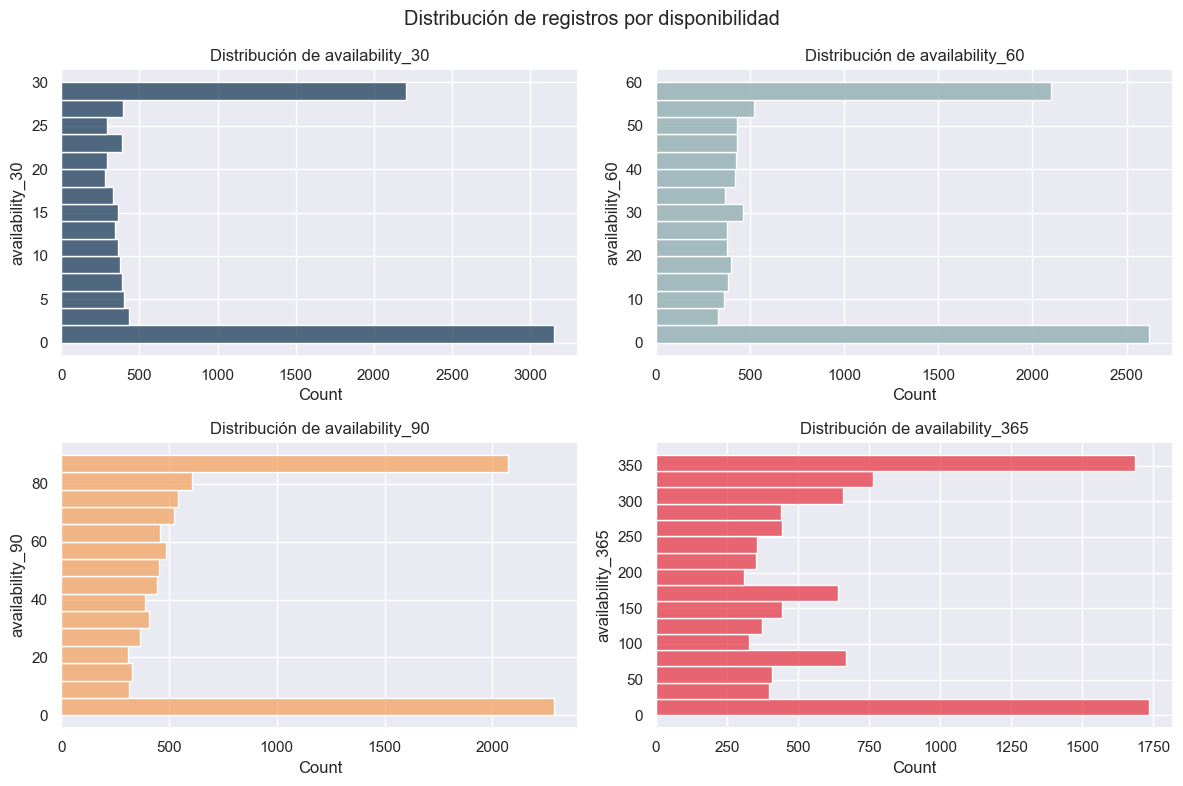

In [85]:
# Seleccionar 4 colores distintos para los boxplots
colores_seleccionados = [paleta[0], paleta[2], paleta[6], paleta[10]]  # Azul profundo, Azul grisáceo, Naranja suave, Rojo coral

# Crear la figura con subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer las columnas y asignarlas a los subgráficos
for i, col in enumerate(availability_cols):
    row, col_idx = divmod(i, 2)  # Calcular posición en la cuadrícula
    sns.histplot(y=df[col], ax=axes[row, col_idx], color=colores_seleccionados[i])  # Aplicar color de la palet  # Crear boxplot
    axes[row, col_idx].set_title(f'Distribución de {col}')  # Agregar título

fig.suptitle("Distribución de registros por disponibilidad")

# Ajustar diseño para evitar superposición
plt.tight_layout()

plt.show()

C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\1265519230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette=paleta[:len(city_counts)])


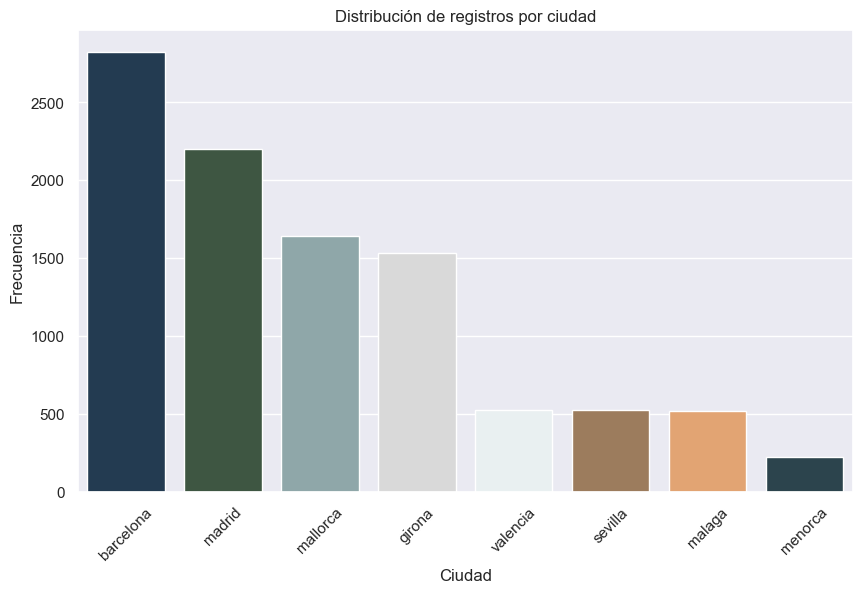

In [61]:
# Contar la frecuencia de cada ciudad
city_counts = df["city"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette=paleta[:len(city_counts)]) 

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia")
plt.title("Distribución de registros por ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

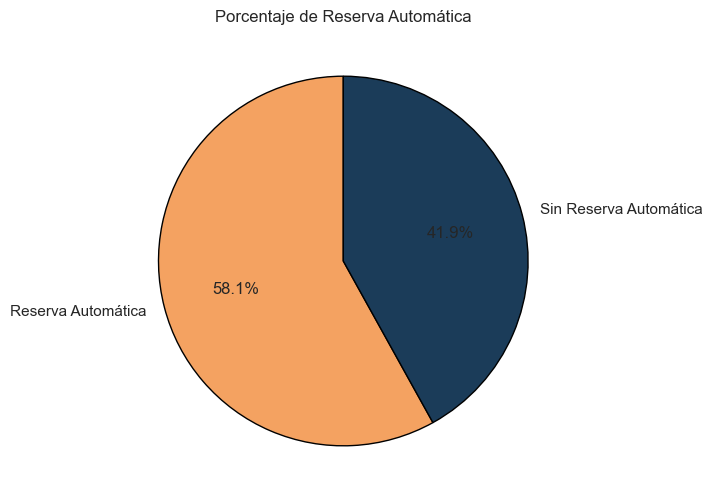

In [75]:
# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[6], paleta[0]]  # Azul profundo y verde bosque

# Convertir is_instant_bookable a tipo booleano si es string
df['is_instant_bookable'] = df['is_instant_bookable'].astype(str).str.lower() == 'true'

# Contar registros con reserva automática (True) y sin ella (False)
counts = df['is_instant_bookable'].value_counts()

# Etiquetas y colores
labels = ['Reserva Automática', 'Sin Reserva Automática']
colors=colores_seleccionados
# colors = ['blue', 'red']

# Crear pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentaje de Reserva Automática')

# Mostrar gráfico
plt.show()


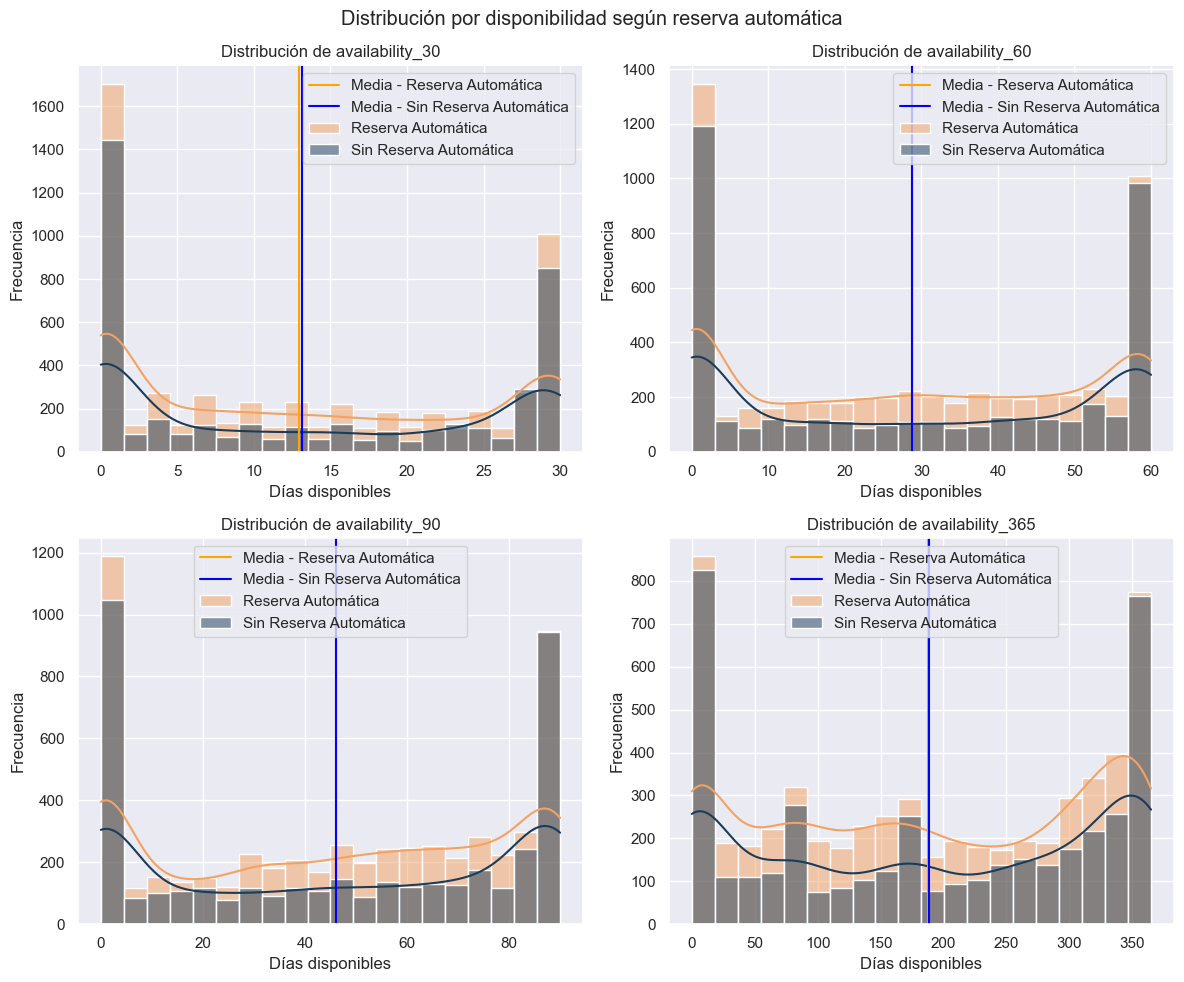

In [86]:
# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Convertir is_instant_bookable a booleano si es string
df['is_instant_bookable'] = df['is_instant_bookable'].astype(str).str.lower() == 'true'

# Lista de las columnas de disponibilidad
availability_columns = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Configurar el estilo
sns.set(style="darkgrid")

# Crear figuras
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Colores para cada tipo de reserva
colors=colores_seleccionados
# colors = {True: 'cornflowerblue', False: 'lightsalmon'}

# Crear histogramas superpuestos
for i, col in enumerate(availability_columns):
    ax = axes[i]
    sns.histplot(df[df['is_instant_bookable'] == True][col], bins=20, kde=True, color=colors[True], label='Reserva Automática', ax=ax)
    sns.histplot(df[df['is_instant_bookable'] == False][col], bins=20, kde=True, color=colors[False], label='Sin Reserva Automática', ax=ax)
    
    ax.axvline(df[df['is_instant_bookable'] == True][col].mean(), color='orange', linestyle='solid', label='Media - Reserva Automática')
    ax.axvline(df[df['is_instant_bookable'] == False][col].mean(), color='blue', linestyle='solid', label='Media - Sin Reserva Automática')
    
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel('Días disponibles')
    ax.set_ylabel('Frecuencia')
    ax.legend()

fig.suptitle("Distribución por disponibilidad según reserva automática")

plt.tight_layout()
plt.show()


## Proporción de registros según is_instant_bookable por ciudad

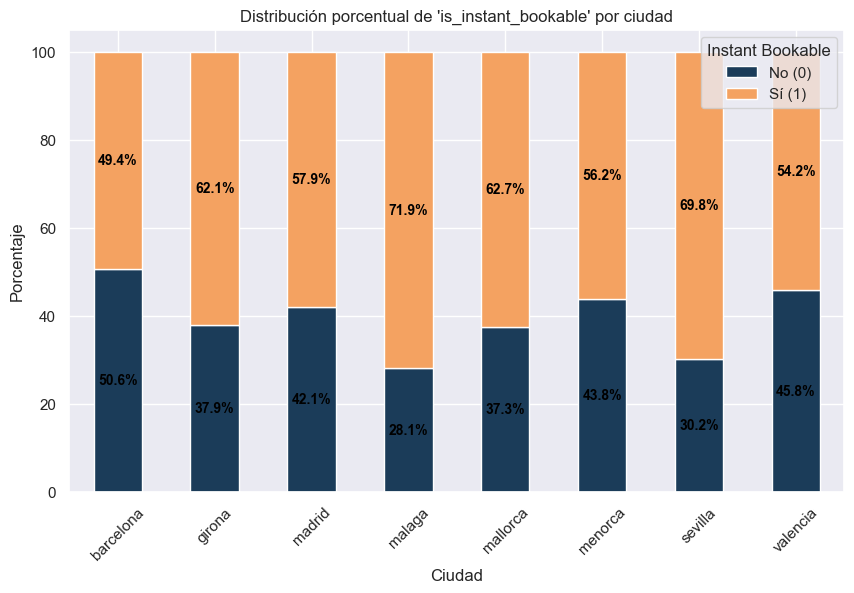

In [87]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Contar la frecuencia de cada ciudad según is_instant_bookable
city_counts = df.groupby(["city", "is_instant_bookable"]).size().unstack()

# Convertir a porcentaje
city_percentage = city_counts.div(city_counts.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas al 100%
fig, ax = plt.subplots(figsize=(10, 6))
city_percentage.plot(kind="bar", stacked=True, ax=ax, color=colores_seleccionados)  # Aplicamos la paleta

# Agregar porcentajes encima de las barras en color negro
for i, city in enumerate(city_percentage.index):
    bottom = 0  # Para apilar correctamente los textos
    for j, value in enumerate(city_percentage.loc[city]):
        if not pd.isna(value):  # Evitar errores con valores NaN
            ax.text(i, bottom + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color="black", fontweight="bold")
            bottom += value

# Personalizar el gráfico
ax.set_xlabel("Ciudad")
ax.set_ylabel("Porcentaje")
ax.set_title("Distribución porcentual de 'is_instant_bookable' por ciudad")
ax.set_xticklabels(city_percentage.index, rotation=45)
ax.legend(title="Instant Bookable", labels=["No (0)", "Sí (1)"])

# Mostrar el gráfico
plt.show()

## Distribución de Disponibilidad a 30 días, por ciudad

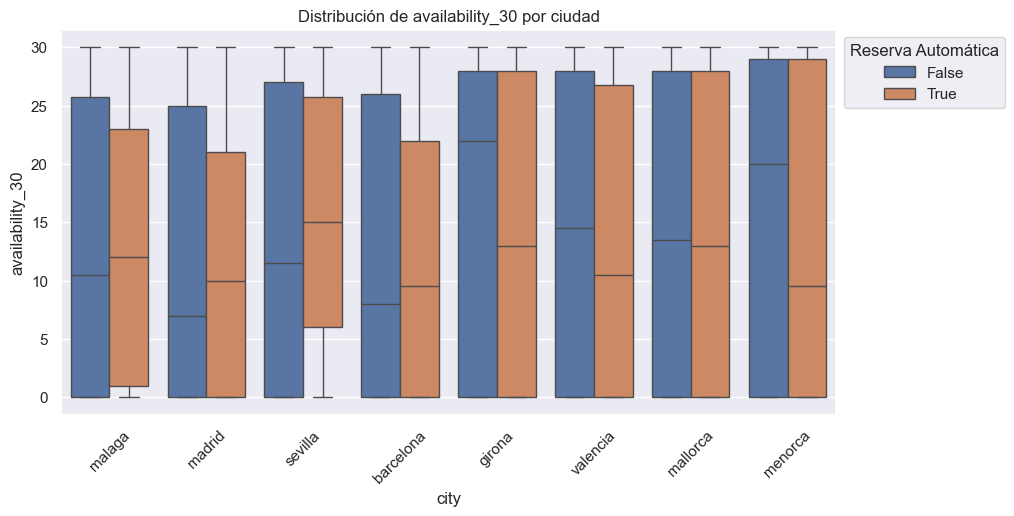

In [88]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="city", y="availability_30", hue="is_instant_bookable", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de availability_30 por ciudad")
plt.legend(title="Reserva Automática", loc="upper left", bbox_to_anchor=(1, 1))  # Ajustar posición fuera del gráfico
plt.show()

# Test Estadísticos

### Test de Normalidad Shapiro

In [33]:
from scipy.stats import shapiro

for col in availability_cols:
    stat, p = shapiro(df[col].dropna())  # Se eliminan valores nulos para evitar errores
    print(f"Shapiro-Wilk Test para {col}: Estadístico={stat}, p-valor={p}")
    if p > 0.05:
        print("No se rechaza la normalidad (puede ser normal)")
    else:
        print("Se rechaza la normalidad (no es normal)")

Shapiro-Wilk Test para availability_30: Estadístico=0.8387881507678311, p-valor=5.477928267802339e-72
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_60: Estadístico=0.8678258968501431, p-valor=6.672262995622411e-68
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_90: Estadístico=0.8782560388226207, p-valor=3.0165700770161904e-66
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_365: Estadístico=0.8985545410730674, p-valor=1.1955955704510382e-62
Se rechaza la normalidad (no es normal)


c:\Users\jodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


Todas las columnas de disponibilidad siguen una distribución no normal.

### Test Mannwhitneyu

In [34]:
from scipy.stats import mannwhitneyu

# Aplicación Mann-Whitney U Test( Para conocer si hay diferencias significativas)
for col in availability_cols:
    group1 = df[df["is_instant_bookable"] == 0][col].dropna()
    group2 = df[df["is_instant_bookable"] == 1][col].dropna()
    
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    print(f"Mann-Whitney U Test para {col}: Estadístico={stat}, p-valor={p}")

Mann-Whitney U Test para availability_30: Estadístico=12043765.5, p-valor=0.3498387666728776
Mann-Whitney U Test para availability_60: Estadístico=12118410.5, p-valor=0.6882414650725159
Mann-Whitney U Test para availability_90: Estadístico=12206790.0, p-valor=0.82368182617346
Mann-Whitney U Test para availability_365: Estadístico=12269534.5, p-valor=0.5073170990366069


El p-value es superior al nivel de significancia de 0.05, lo que indica que no se puede rechazar la hipótesis nula. Esto sugiere que no existen diferencias estadísticamente significativas en la disponibilidad entre alojamientos con reserva instantánea y aquellos que no cuentan con esta opción. En consecuencia, no hay evidencia suficiente para afirmar que la disponibilidad se vea afectada por la característica instant_bookable.

# TEST ANOVA

### SUPUESTO DE NORMALIDAD

##### Normalidad factor is_instant_bookable

In [35]:
import scipy.stats as stats

# Definir el factor y la variable dependiente
factor = "is_instant_bookable"
variable_dependiente = "availability_30"

# Almacenar resultados
results = []

# Evaluar normalidad para cada valor del factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Verificar que el grupo tiene suficientes datos para Shapiro-Wilk
    if len(subset) > 3:
        stat, p_value = stats.shapiro(subset)
        results.append([variable_dependiente, factor, value, stat, p_value])
    else:
        results.append([variable_dependiente, factor, value, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame y mostrar
df_results_is_instant = pd.DataFrame(results, columns=["Variable", "Factor", "Valor", "Statistic", "P-value"])
print(df_results_is_instant)

          Variable               Factor  Valor  Statistic       P-value
0  availability_30  is_instant_bookable  False   0.815747  1.499151e-56
1  availability_30  is_instant_bookable   True   0.854292  1.116086e-58


c:\Users\jodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5806.
  res = hypotest_fun_out(*samples, **kwds)


##### Normalidad factor city

In [36]:
# Definir el factor y la variable dependiente
factor = "city"

# Almacenar resultados
results = []

# Evaluar normalidad para cada valor del factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Verificar que el grupo tiene suficientes datos para Shapiro-Wilk
    if len(subset) > 3:
        stat, p_value = stats.shapiro(subset)
        results.append([variable_dependiente, factor, value, stat, p_value])
    else:
        results.append([variable_dependiente, factor, value, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame y mostrar
df_results_city = pd.DataFrame(results, columns=["Variable", "Factor", "Valor", "Statistic", "P-value"])
print(df_results_city)

          Variable Factor      Valor  Statistic       P-value
0  availability_30   city     malaga   0.871483  2.709110e-20
1  availability_30   city     madrid   0.839270  1.410857e-42
2  availability_30   city    sevilla   0.894744  1.746960e-18
3  availability_30   city  barcelona   0.838792  6.591649e-47
4  availability_30   city     girona   0.803112  1.191192e-39
5  availability_30   city   valencia   0.831362  3.444596e-23
6  availability_30   city   mallorca   0.836199  3.995069e-38
7  availability_30   city    menorca   0.759060  8.144919e-18


El p_value es claramente inferior en todos los casos, por lo que se rechaza la hipotesis nula de normalidad. No cumpliendose este primer supuesto.

### SUPUESTO DE HOMOCEDASTICIDAD

##### Homocedastidad factor is_instant_bookable

In [37]:
# Definir el factor y la variable dependiente
factor = "is_instant_bookable"
variable_dependiente = "availability_30"

# Crear lista para almacenar los grupos
groups = []

# Agrupar los datos según el factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Solo añadir grupos con suficientes datos
    if len(subset) > 3:
        groups.append(subset)

# Aplicar el test de Levene si hay al menos 2 grupos con datos
if len(groups) > 1:
    stat, p_value = stats.levene(*groups)
    print(f"Test de Levene para {factor} - Statistic: {stat:.4f}, P-value: {p_value:.4e}")

    # Interpretación
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: Se asume homocedasticidad (varianzas iguales).")
    else:
        print("Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).")
else:
    print(f"No hay suficientes grupos con datos para realizar el test de Levene sobre {factor}.")

Test de Levene para is_instant_bookable - Statistic: 73.0959, P-value: 1.4157e-17
Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).


##### Homocedastidad factor city

In [38]:
# Definir el factor
factor = "city"

# Crear lista para almacenar los grupos
groups = []

# Agrupar los datos según el factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Solo añadir grupos con suficientes datos
    if len(subset) > 3:
        groups.append(subset)

# Aplicar el test de Levene si hay al menos 2 grupos con datos
if len(groups) > 1:
    stat, p_value = stats.levene(*groups)
    print(f"Test de Levene para {factor} - Statistic: {stat:.4f}, P-value: {p_value:.4e}")

    # Interpretación
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: Se asume homocedasticidad (varianzas iguales).")
    else:
        print("Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).")
else:
    print(f"No hay suficientes grupos con datos para realizar el test de Levene sobre {factor}.")

Test de Levene para city - Statistic: 26.7704, P-value: 1.2149e-36
Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).


### EJECUCIÓN TWO WAY ANOVA a 30 días

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definir la variable dependiente y los factores
variable_dependiente = "availability_30"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df          F        PR(>F)
C(is_instant_bookable)          4.446464e+02     1.0   3.216135  7.294587e-02
C(city)                         1.691524e+04     7.0  17.478312  3.497109e-23
C(is_instant_bookable):C(city)  3.217537e+03     7.0   3.324643  1.541061e-03
Residual                        1.380337e+06  9984.0        NaN           NaN


is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Definir la variable dependiente y el factor
variable_dependiente = "availability_30"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)

        City  F-statistic   P-value
0     malaga     0.013329  0.908133
1     madrid     0.168516  0.681474
2    sevilla     3.883224  0.049299
3  barcelona     0.365735  0.545387
4     girona    18.094262  0.000022
5   valencia     0.933306  0.334449
6   mallorca     0.084818  0.770908
7    menorca     0.804596  0.370694


C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\2906869651.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\2906869651.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\2906869651.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us

El impacto de is_instant_bookable en availability_30 es significativo solo en Sevilla y Girona.

En Sevilla hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_30.

### EJECUCIÓN TWO WAY ANOVA a 60 días

In [41]:
# Definir la variable dependiente y los factores
variable_dependiente = "availability_60"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df          F        PR(>F)
C(is_instant_bookable)          3.477405e+02     1.0   0.665372  4.146893e-01
C(city)                         4.167672e+04     7.0  11.392124  1.785003e-14
C(is_instant_bookable):C(city)  1.704362e+04     7.0   4.658788  3.188052e-05
Residual                        5.217895e+06  9984.0        NaN           NaN


is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Definir la variable dependiente y el factor
variable_dependiente = "availability_60"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)

        City  F-statistic   P-value
0     malaga     0.001800  0.966175
1     madrid     4.193906  0.040688
2    sevilla     4.926971  0.026870
3  barcelona     0.105341  0.745536
4     girona    21.669026  0.000004
5   valencia     1.095115  0.295821
6   mallorca     0.122689  0.726181
7    menorca     0.436121  0.509685


C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\2637896115.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\2637896115.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\2637896115.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us

El impacto de is_instant_bookable en availability_60 es significativo en Sevilla, Madrid y Girona.

En Sevilla y Madrid hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_60.

### EJECUCIÓN TWO WAY ANOVA a 90 días


In [43]:
# Definir la variable dependiente y los factores
variable_dependiente = "availability_90"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df         F        PR(>F)
C(is_instant_bookable)          2.132331e+02     1.0  0.188822  6.639085e-01
C(city)                         6.070195e+04     7.0  7.678949  2.793726e-09
C(is_instant_bookable):C(city)  5.079802e+04     7.0  6.426076  1.434757e-07
Residual                        1.127476e+07  9984.0       NaN           NaN



is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)


In [44]:
# Definir la variable dependiente y el factor
variable_dependiente = "availability_90"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)


        City  F-statistic       P-value
0     malaga     0.031335  8.595644e-01
1     madrid     7.987805  4.751881e-03
2    sevilla     4.805603  2.880816e-02
3  barcelona     1.170586  2.793733e-01
4     girona    28.888987  8.850195e-08
5   valencia     0.559001  4.549971e-01
6   mallorca     0.792238  3.735546e-01
7    menorca     0.487694  4.856887e-01


C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\4110743168.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\4110743168.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\4110743168.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us


El impacto de is_instant_bookable en availability_90 es significativo en Sevilla, Madrid y Girona.

En Sevilla y Madrid hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_90.

### EJECUCIÓN TWO WAY ANOVA a 365 días


In [45]:

# Definir la variable dependiente y los factores
variable_dependiente = "availability_365"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df          F        PR(>F)
C(is_instant_bookable)          3.034299e+04     1.0   1.816677  1.777400e-01
C(city)                         2.837677e+06     7.0  24.270801  5.178395e-33
C(is_instant_bookable):C(city)  1.411916e+06     7.0  12.076193  1.912301e-15
Residual                        1.667575e+08  9984.0        NaN           NaN




is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)


In [46]:

# Definir la variable dependiente y el factor
variable_dependiente = "availability_365"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)


        City  F-statistic       P-value
0     malaga     0.017308  8.953842e-01
1     madrid     4.576757  3.251825e-02
2    sevilla     1.200223  2.737823e-01
3  barcelona     7.338242  6.791036e-03
4     girona    69.878068  1.398476e-16
5   valencia     1.713478  1.911062e-01
6   mallorca     1.830542  1.762497e-01
7    menorca     2.699550  1.017922e-01


C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\1975490713.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\1975490713.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_71088\1975490713.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us



El impacto de is_instant_bookable en availability_365 es significativo en Barcelona, Madrid y Girona.

En Barcelona y Madrid hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_365.

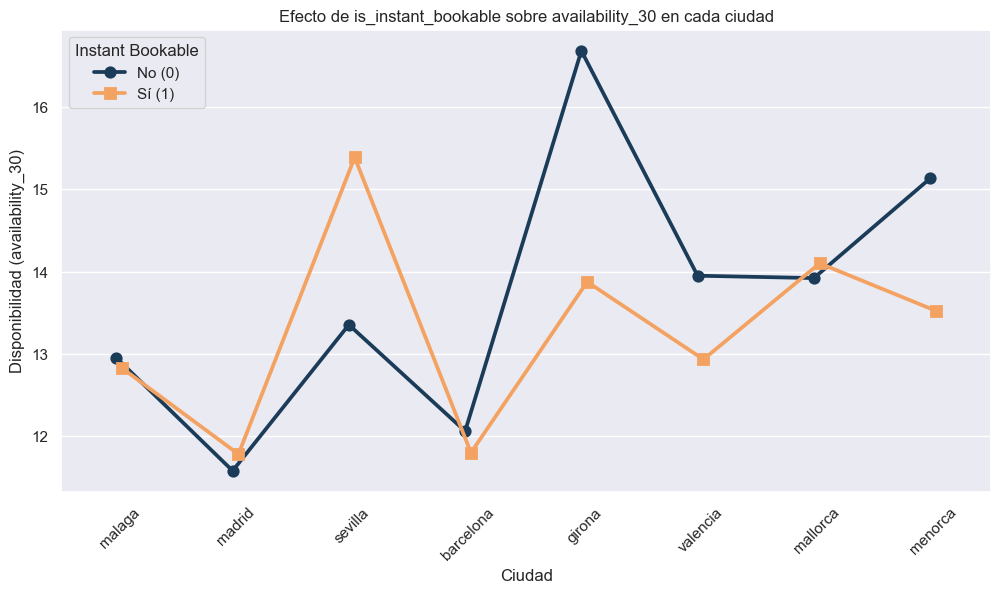

In [78]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_30", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados  # Definir colores manualmente
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_30)")
plt.title("Efecto de is_instant_bookable sobre availability_30 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

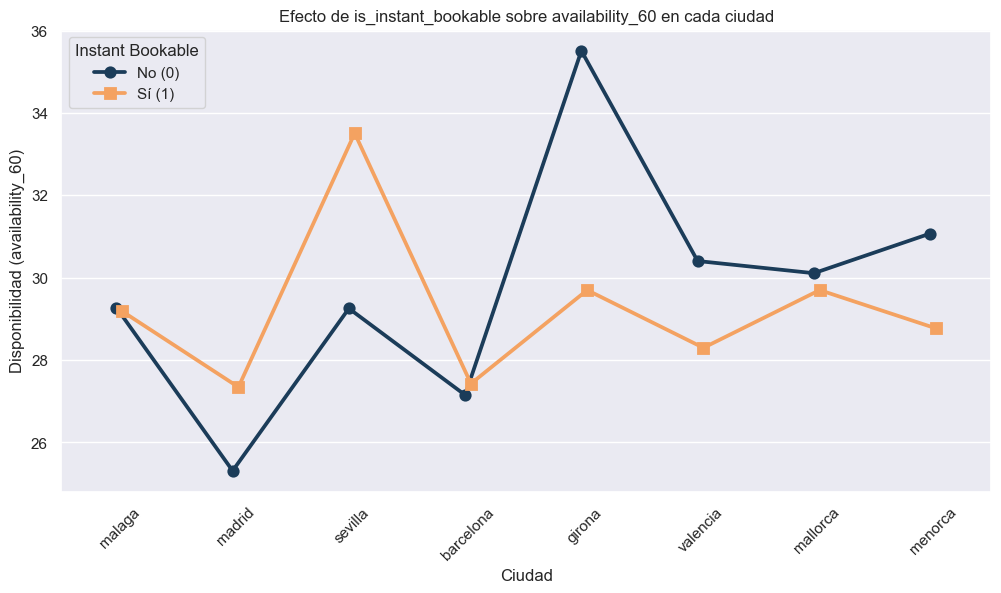

In [79]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_60", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_60)")
plt.title("Efecto de is_instant_bookable sobre availability_60 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

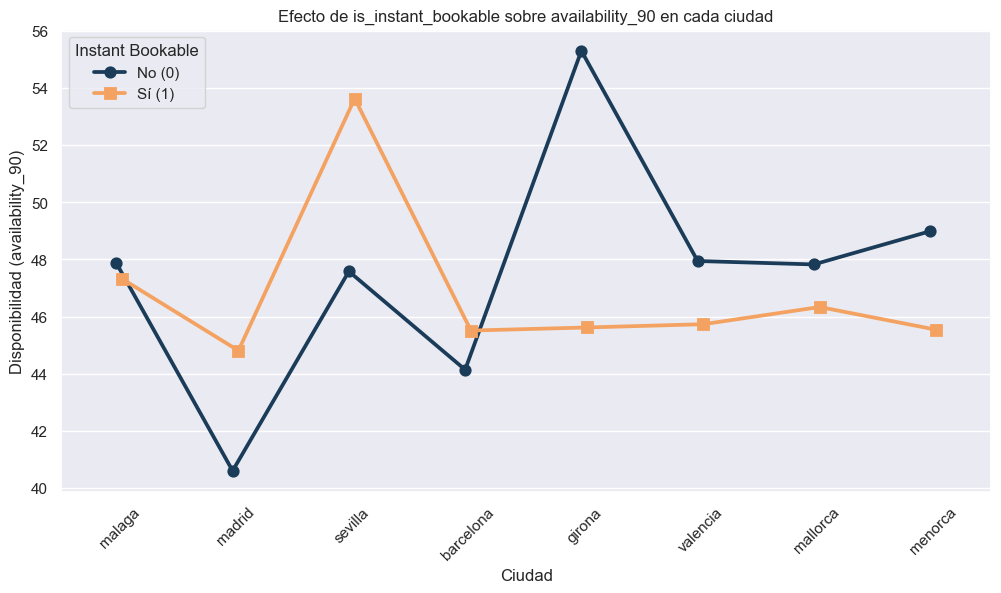

In [80]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_90", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_90)")
plt.title("Efecto de is_instant_bookable sobre availability_90 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

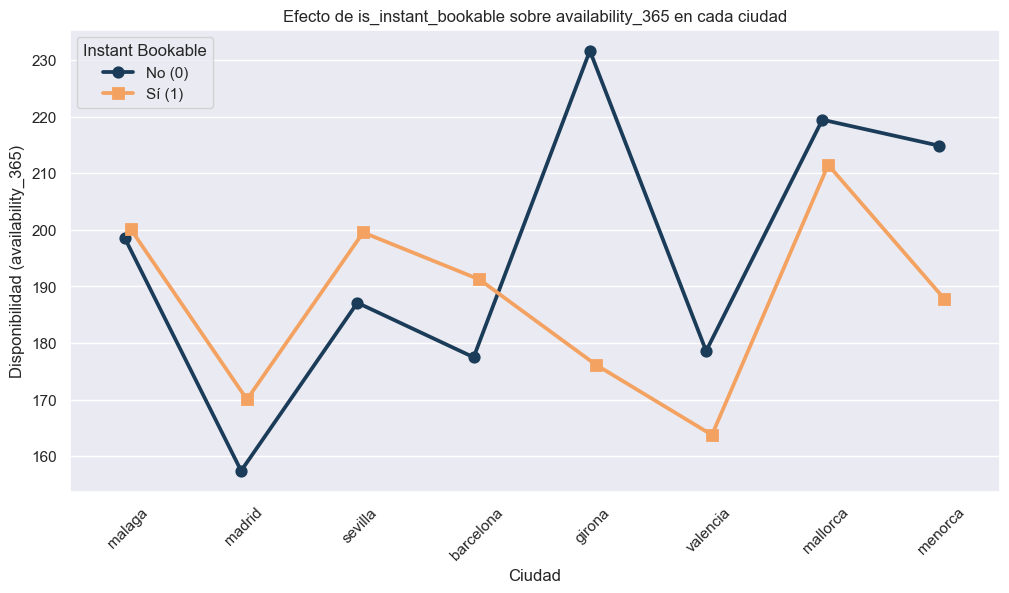

In [81]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_365", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_365)")
plt.title("Efecto de is_instant_bookable sobre availability_365 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

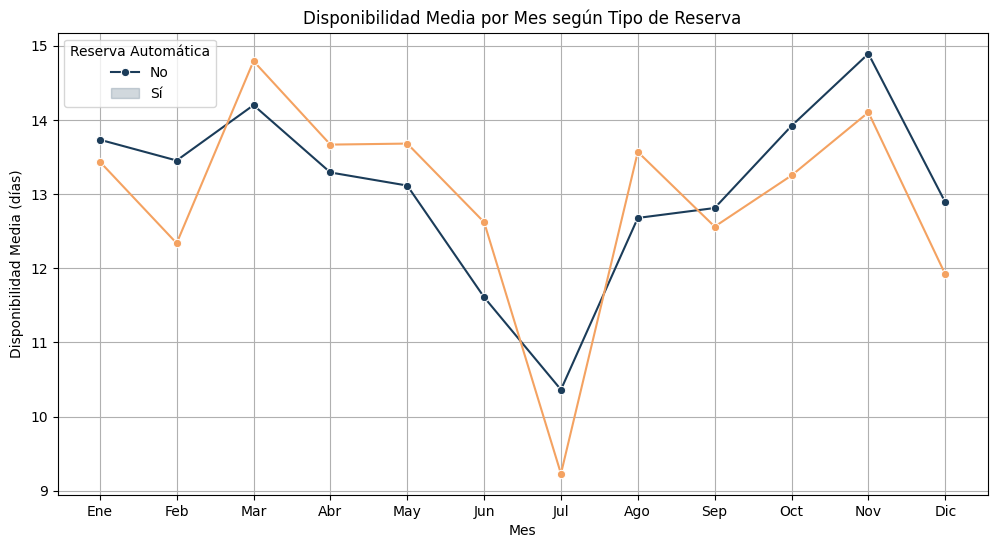

TypeError: agg function failed [how->mean,dtype->object]

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna de fecha a tipo datetime si no lo está
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Extraer el mes para agrupar
# (Si no hay una columna de fechas, habría que calcularla desde otro campo)
df['month'] = df['insert_date'].dt.month

# Calcular disponibilidad media por mes y tipo de reserva
df_monthly = df.groupby(['month', 'is_instant_bookable'])['availability_30'].mean().reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='month', y='availability_30', hue='is_instant_bookable', marker='o', palette=['#1B3C59', '#F4A261'])

# Personalizar
plt.xlabel('Mes')
plt.ylabel('Disponibilidad Media (días)')
plt.title('Disponibilidad Media por Mes según Tipo de Reserva')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Reserva Automática', labels=['No', 'Sí'])
plt.grid(True)
plt.show()

# Análisis de propiedades con picos en 0 y 30 días
df_dispo_extremos = df[df['availability_30'].isin([0, 30])]

# Comparar características principales
caracteristicas_interes = ['price', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'bathrooms', 'room_type']
df_comparacion = df_dispo_extremos.groupby('availability_30')[caracteristicas_interes].mean()
print(df_comparacion)


C:\Users\jodri\AppData\Local\Temp\ipykernel_3272\3521247890.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_extremos, x="availability_30", y="price", palette=["#E63946", "#457B9D"])


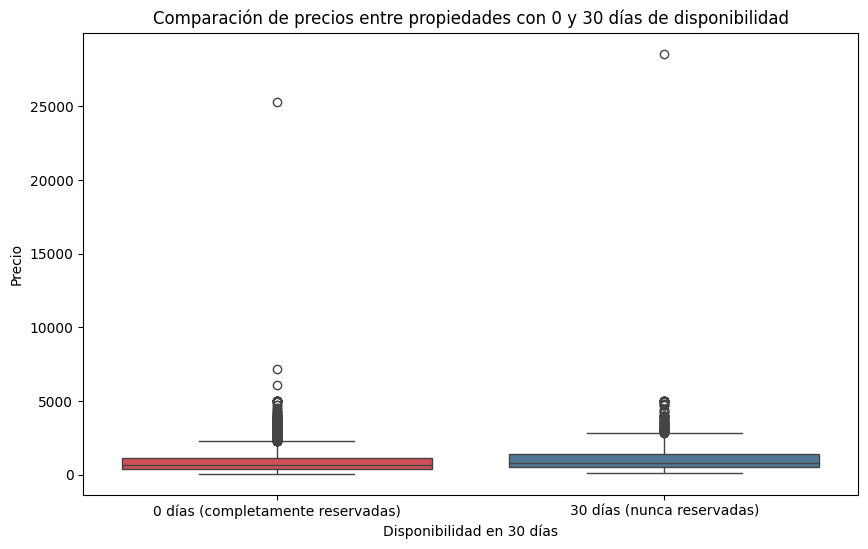

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar propiedades con disponibilidad extrema
df_extremos = df[df["availability_30"].isin([0, 30])]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_extremos, x="availability_30", y="price", palette=["#E63946", "#457B9D"])
plt.title("Comparación de precios entre propiedades con 0 y 30 días de disponibilidad")
plt.xlabel("Disponibilidad en 30 días")
plt.ylabel("Precio")
plt.xticks([0, 1], ["0 días (completamente reservadas)", "30 días (nunca reservadas)"])
plt.show()


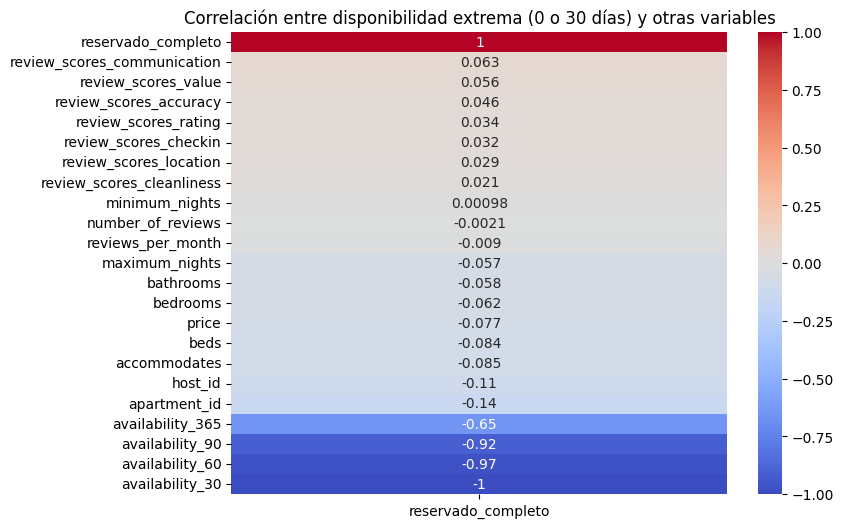

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo propiedades con disponibilidad extrema
df_extremos = df[df["availability_30"].isin([0, 30])].copy()

# Crear una variable binaria (0 = nunca disponible, 1 = completamente reservado)
df_extremos["reservado_completo"] = df_extremos["availability_30"].apply(lambda x: 1 if x == 0 else 0)

# Seleccionar solo variables numéricas
df_numerico = df_extremos.select_dtypes(include=["number"])

# Calcular la correlación con la variable objetivo
correlaciones = df_numerico.corr()["reservado_completo"].sort_values(ascending=False)

# Visualizar el mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones.to_frame(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlación entre disponibilidad extrema (0 o 30 días) y otras variables")
plt.show()